In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import cycle

In [2]:
def plot_psd_diagonal_scatter(psd_matrix, max_bin=None):
    # Check if the matrix is 3D and reduce dimensions if necessary
    if psd_matrix.ndim == 3:
        psd_matrix = psd_matrix.squeeze()
    
    # Extract the diagonal elements
    diagonal_elements = np.diagonal(psd_matrix)
    
    # Compute the squared magnitudes of the diagonal elements
    squared_magnitudes = np.abs(diagonal_elements) ** 2
    
    # Generate frequency bin indices
    frequency_bins = np.arange(len(squared_magnitudes))
    
    # Limit the number of frequency bins if max_bin is set
    if max_bin is not None:
        frequency_bins = frequency_bins[:max_bin]
        squared_magnitudes = squared_magnitudes[:max_bin]
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(frequency_bins, squared_magnitudes, color='blue', label='Squared Magnitude')
    
    # Plot the trend using a line plot
    plt.plot(frequency_bins, squared_magnitudes, color='red', linestyle='dashed', alpha=0.5, label='Trend')
    
    plt.title('Squared Magnitudes of PSD Matrix Diagonal')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Squared Magnitude')
    plt.grid(True)
    plt.legend()
    plt.show()

In [7]:
def plot_psd_diagonal_scatter_multi(squared_magnitudes, max_bin=None):
    # Generate frequency bin indices
    frequency_bins = np.arange(squared_magnitudes.shape[0])
    
    # Limit the number of frequency bins if max_bin is set
    if max_bin is not None:
        frequency_bins = frequency_bins[:max_bin]
        squared_magnitudes = squared_magnitudes[:max_bin]
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(frequency_bins, squared_magnitudes[:, 0], color='blue', label='Squared Magnitude Channel 1')
    plt.scatter(frequency_bins, squared_magnitudes[:, 1], color='green', label='Squared Magnitude Channel 2')
    
    # Plot the trend using a line plot
    plt.plot(frequency_bins, squared_magnitudes[:, 0], color='blue', linestyle='dashed', alpha=0.5)
    plt.plot(frequency_bins, squared_magnitudes[:, 1], color='green', linestyle='dashed', alpha=0.5)
    
    plt.title('Squared Magnitudes of PSD Matrix Diagonal')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Squared Magnitude')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
# plot_psd_diagonal_scatter(your_loaded_squared_magnitudes, max_bin=100)


In [10]:
psd_matrix_target_0 = np.load(Path("test/id04030_JbcD0P6KGe0_00039VSid08696_f0gzvkyroAY_00388/squared_magnitudes_target_mic0.wav.npy"))
psd_matrix_target_1 = np.load(Path("test/id04030_JbcD0P6KGe0_00039VSid08696_f0gzvkyroAY_00388/squared_magnitudes_target_mic1.wav.npy"))
psd_matrix_target_1 = np.load(Path("test/id04030_JbcD0P6KGe0_00039VSid08696_f0gzvkyroAY_00388/squared_magnitudes_target_mic1.wav.npy"))
psd_matrix_noise_0 = np.load(Path("test/id04030_JbcD0P6KGe0_00039VSid08696_f0gzvkyroAY_00388/squared_magnitudes_noise_mic0.wav.npy"))
psd_matrix_noise_1 = np.load(Path("test/id04030_JbcD0P6KGe0_00039VSid08696_f0gzvkyroAY_00388/squared_magnitudes_noise_mic1.wav.npy"))
psd_matrix_noise_multi = np.load(Path("test/id04030_JbcD0P6KGe0_00039VSid08696_f0gzvkyroAY_00388/squared_magnitudes_noise_multichannel.npy"))
psd_matrix_target_multi = np.load(Path("test/id04030_JbcD0P6KGe0_00039VSid08696_f0gzvkyroAY_00388/squared_magnitudes_target_multichannel.npy"))


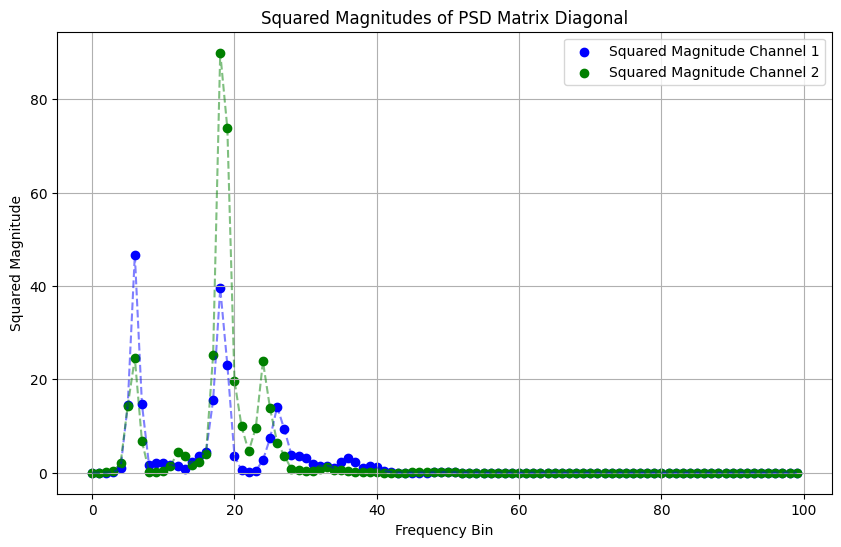

In [11]:
plot_psd_diagonal_scatter_multi(psd_matrix_target_multi, max_bin=100)

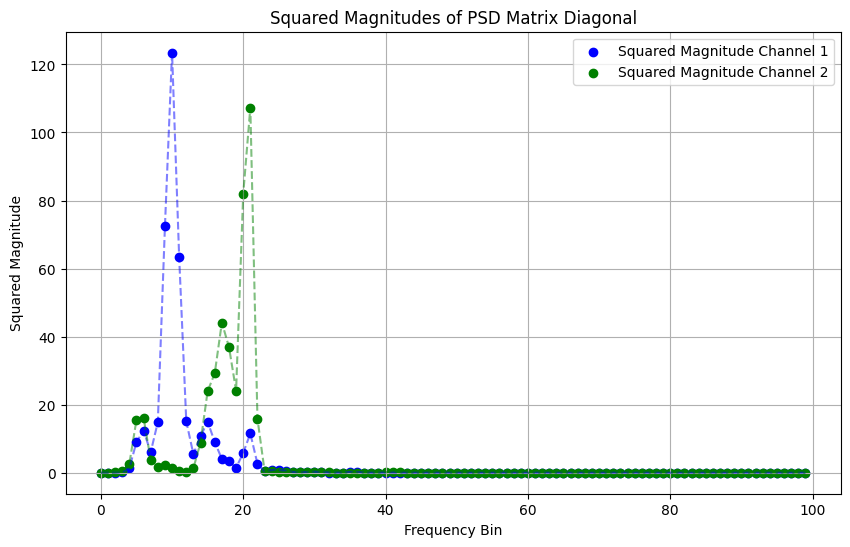

In [12]:
plot_psd_diagonal_scatter_multi(psd_matrix_noise_multi, max_bin=100)

In [ ]:
def plot_psd_diagonal_scatter_full(psd_matrices, labels, max_bin=None):
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(psd_matrices)))

    for psd_matrix, label, color in zip(psd_matrices, labels, colors):
        # If the matrix is 3D (with a singleton dimension), reduce to 2D
        if psd_matrix.ndim == 3 and psd_matrix.shape[-1] == 1:
            psd_matrix = psd_matrix.squeeze()
        psd_matrix = np.abs(psd_matrix) ** 2
        diagonal_elements = np.diagonal(psd_matrix)
        squared_magnitudes = np.abs(diagonal_elements) ** 2
        frequency_bins = np.arange(len(squared_magnitudes))

        print(f"Plotting {label}: Frequency bins = {len(frequency_bins)}, Squared magnitudes = {len(squared_magnitudes)}")

        if max_bin is not None:
            frequency_bins = frequency_bins[:max_bin]
            squared_magnitudes = squared_magnitudes[:max_bin]
        
        # Now plot
        plt.scatter(frequency_bins, squared_magnitudes, color=color, label=label)
        plt.plot(frequency_bins, squared_magnitudes, color=color, linestyle='dashed', alpha=0.5)

    plt.title('Squared Magnitudes of PSD Matrix Diagonal')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Squared Magnitude')
    plt.legend()
    plt.show()


In [ ]:
psd_matrices = [psd_matrix_target_0, psd_matrix_noise_0]  # List your matrices here
labels = ['Mic0_T', 'Mic0_N']  # List your labels here
print("Shape of psd_matrix_target_0:", psd_matrix_target_0.shape)
print("Contents of psd_matrix_target_0:", psd_matrix_target_0)

In [ ]:
plot_psd_diagonal_scatter_full(psd_matrices, labels, max_bin=75)

In [ ]:
 plot_psd_diagonal_scatter(psd_matrix_noise_0, max_bin=100)

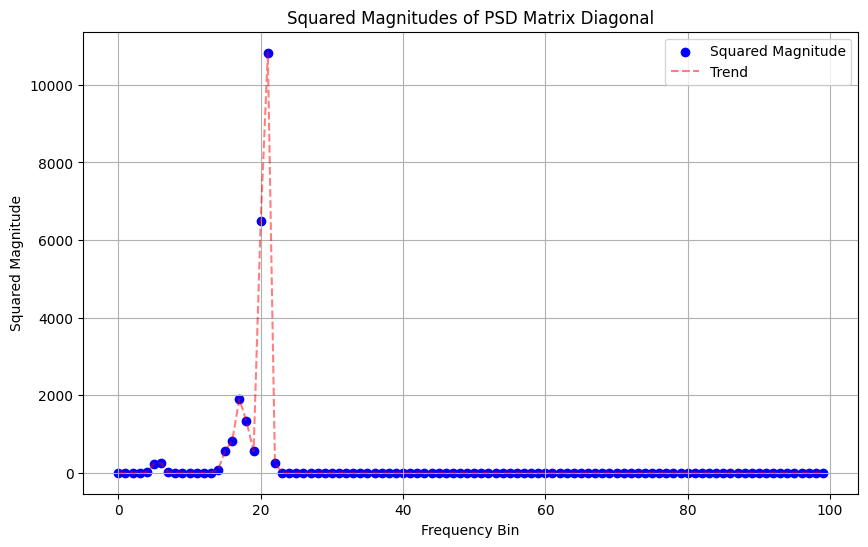

In [5]:
plot_psd_diagonal_scatter(psd_matrix_target_1, max_bin=100)

In [ ]:
 plot_psd_diagonal_scatter(psd_matrix_noise_1, max_bin=100)

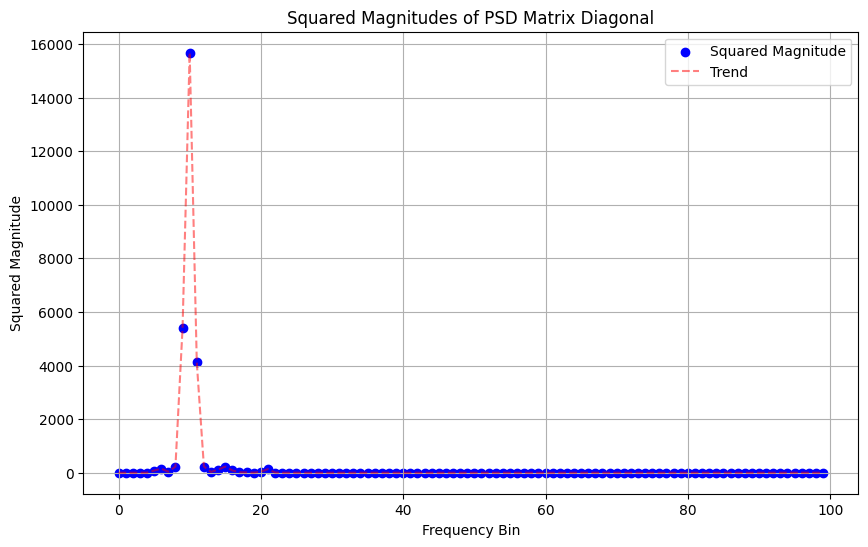

In [4]:
plot_psd_diagonal_scatter(psd_matrix_target_0, max_bin=100)